In [11]:
# Import dependency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime
import os
import pandas as pd

In [12]:
# Output File (CSV)
output_data_file = "Source Data/Cafes_and_restaurants__with_seating_capacity.csv"

In [13]:
# Reading the file and convert into a Dataframe
raw_df = pd.read_csv(output_data_file)
raw_df.head()

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.9595,-37.8206,POINT (144.9595 -37.8206)
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.9595,-37.8206,POINT (144.9595 -37.8206)
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.9623,-37.8195,POINT (144.9623 -37.8195)
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.9623,-37.8195,POINT (144.9623 -37.8195)
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.9623,-37.8195,POINT (144.9623 -37.8195)


In [14]:
# Identify the variety of industry types within the dataset
unique_industry = raw_df['Industry (ANZSIC4) description'].unique()
industry_count = len(unique_industry)
print(unique_industry)
print(f'Number of total industry: {industry_count}')

['Zoological and Botanical Gardens Operation'
 'Other Personal Services n.e.c.'
 'Health and Fitness Centres and Gymnasia Operation'
 'Other Gambling Activities' 'Cafes and Restaurants'
 'Takeaway Food Services' 'Pubs, Taverns and Bars' 'Accommodation'
 'Internet Service Providers and Web Search Portals'
 'Fruit and Vegetable Retailing' 'Other Specialised Food Retailing'
 'Clubs (Hospitality)' 'Oil and Gas Extraction'
 'Other Interest Group Services n.e.c.'
 'Business and Professional Association Services'
 'Sport and Camping Equipment Retailing' 'Newspaper and Book Retailing'
 'Convenience Store' 'Professional Photographic Services'
 'Motor Cycle Retailing' 'Higher Education'
 'Fruit and Vegetable Wholesaling' 'Other Administrative Services n.e.c.'
 'Fresh Meat, Fish and Poultry Retailing'
 'Computer System Design and Related Services' 'Common Area'
 'Performing Arts Venue Operation'
 'Sports and Physical Recreation Clubs and Sports Professionals'
 'Fuel Retailing'
 'Horse and Dog Rac

In [15]:
# Identify the number of unique address (by the business address) within the dataset
unique_business_address = raw_df['Business address'].unique()
unique_business_address_count = len(unique_business_address)
print(unique_business_address)
print(f'Number of total unique address: {unique_business_address_count}')

['469-479 King Street MELBOURNE 3000'
 'Vault 12, 387 Flinders Street MELBOURNE 3000'
 'Vault 1, 363-367 Flinders Street MELBOURNE 3000' ...
 '29 Melrose Street NORTH MELBOURNE VIC 3051'
 '31 Melrose Street NORTH MELBOURNE VIC 3051'
 '17 Melrose Street NORTH MELBOURNE VIC 3051']
Number of total unique address: 6917


In [16]:
# Identify the number of unique location within the dataset, which should match with the business address
unique_Location = raw_df['Location'].unique()
unique_Location_count = len(unique_business_address)
print(unique_Location)
print(f'Number of total unique Location: {unique_Location_count}')

['POINT (144.9595 -37.8206)' 'POINT (144.9623 -37.8195)'
 'POINT (144.9653 -37.8187)' ... 'POINT (144.9353015 -37.79142168)'
 'POINT (144.9356959 -37.79223169)' 'POINT (144.9311131 -37.79436219)']
Number of total unique Location: 6917


In [17]:
# Identify the number of unique location by "Building address" within the dataset.
by_building = raw_df.set_index('Building address').groupby(['Building address'])
by_building.head()

,Census year,Block ID,Property ID,Base property ID,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location
Building address,,,,,,,,,,,,,
0 King Street MELBOURNE 3000,2002,2,111467,103973,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206)
0 King Street MELBOURNE 3000,2002,2,111467,103973,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72 Stubbs Street KENSINGTON VIC 3031,2020,2539,614669,614669,Kensington,72 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,30,144.93530,-37.79142,POINT (144.9353015 -37.79142168)
25-77 Stubbs Street KENSINGTON VIC 3031,2020,2540,617955,617955,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169)
25-77 Stubbs Street KENSINGTON VIC 3031,2020,2540,617955,617955,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169)


In [18]:
### --- RECATEGORISATION OF INDUSTRY AND CLEANING DATA --- ###
# Consolidate the industry type into 5 categories being:
# - The top 4 most frequent "Industry (ANZSIC4) description" category; and
# - All other categories will be re-categorised into "Others".

## For each unique "Industry (ANZSIC4) description" count how many time it appears in the data set.
IndustryCount_df = pd.DataFrame(raw_df.groupby("Industry (ANZSIC4) description").size())
IndustryCount_df.rename(columns = {0:"Count"}, inplace = True)
IndustryCount_df.head()

## Sort IndustryCount_df descending order by column "Count"
IndustryCount_df = IndustryCount_df.sort_values(by=["Count"], ascending = False)

## Show dataframe's top 4 most frequent category. These categories will be kept as is.
## All other categories will be reclassified to "Others"
IndustryCount_df.head(4)

,Count
Industry (ANZSIC4) description,
Cafes and Restaurants,40431
Takeaway Food Services,7445
"Pubs, Taverns and Bars",3282
Accommodation,999


In [19]:
### COMMENCE RECATEGORISATION PROCESS
## Insert new column called "Recategorised Industry".
raw_df["Recategorised Industry"]=""
raw_df.head()

## Populate the "Recategorised Industry" Column to either state one of the top 4 industry or
## "Others" if it is not one of the top 4 industry.
def categorize(row):
    if row["Industry (ANZSIC4) description"]== "Cafes and Restaurants" :
        return "Cafes and Restaurants"
    elif row["Industry (ANZSIC4) description"]== "Takeaway Food Services" :
        return "Takeaway Food Services"
    elif row["Industry (ANZSIC4) description"]== "Pubs, Taverns and Bars" :
        return "Pubs, Taverns and Bars"
    elif row["Industry (ANZSIC4) description"]== "Accommodation" :
        return "Accommodation"
    else:
        return "Others"
raw_df["Recategorised Industry"]= raw_df.apply(lambda row: categorize(row), axis = 1)
raw_df

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location,Recategorised Industry
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54047,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54048,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54049,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,169 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants
54050,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,173 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants


In [20]:
### IDENTIFY ROWS WITH MISSING DATA AND DELETE ROWS
## Drop any rows with missing data
cleanraw_df = raw_df.dropna()
cleanraw_df

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location,Recategorised Industry
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54047,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54048,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54049,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,169 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants
54050,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,173 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants


# Rosa's Bits

# Dhiren's Bits

# Michael's Bits

# Analyse On Industry Type Trends Over Years

The objective of this analysis is to determine whether there is a change in the industry type trends over the years. This will help users gauge which type of hospitality industry are rising in popularity and which are declining.

In [54]:
### REMOVE DUPLICATED BUSINESS DUE TO "INDOOR" VS "OUTDOOR" SUBCATEGORY
## Create a duplicate dataframe for analysis
IndType_df = cleanraw_df

### Create a key field based on the year and business address
## Insert new column called "Key Field" which is a combination of the Census Year and Business Address Column.
IndType_df["Key Field"]=IndType_df["Census year"].astype(str) + " "+IndType_df["Business address"]
IndType_df



C:\Users\brand\AppData\Local\Temp/ipykernel_19124/3855902564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IndType_df["Key Field"]=IndType_df["Census year"].astype(str) + " "+IndType_df["Business address"]


,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location,Recategorised Industry,Key Field
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206),Others,2002 469-479 King Street MELBOURNE 3000
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206),Others,2002 469-479 King Street MELBOURNE 3000
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195),Others,"2002 Vault 12, 387 Flinders Street MELBOURNE 3000"
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195),Others,"2002 Vault 1, 363-367 Flinders Street MELBOURN..."
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195),Others,"2002 Vault 1, 363-367 Flinders Street MELBOURN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54047,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants,2020 61 Stubbs Street KENSINGTON VIC 3031
54048,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants,2020 61 Stubbs Street KENSINGTON VIC 3031
54049,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,169 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants,2020 169 Rankins Road KENSINGTON VIC 3031
54050,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,173 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants,2020 173 Rankins Road KENSINGTON VIC 3031


In [55]:
## Drop Number of Seats and Seating Type columns as they are irrellevant for this analysis.
IndTypeNoSeat_df = IndType_df.drop('Number of seats',1)
IndTypeNoSeat_df= IndTypeNoSeat_df.drop('Seating type',1)
IndTypeNoSeat_df

C:\Users\brand\AppData\Local\Temp/ipykernel_19124/1695269067.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  IndTypeNoSeat_df = IndType_df.drop('Number of seats',1)
C:\Users\brand\AppData\Local\Temp/ipykernel_19124/1695269067.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  IndTypeNoSeat_df= IndTypeNoSeat_df.drop('Seating type',1)


,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,x coordinate,y coordinate,Location,Recategorised Industry,Key Field
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,144.95950,-37.82060,POINT (144.9595 -37.8206),Others,2002 469-479 King Street MELBOURNE 3000
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,144.95950,-37.82060,POINT (144.9595 -37.8206),Others,2002 469-479 King Street MELBOURNE 3000
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,144.96230,-37.81950,POINT (144.9623 -37.8195),Others,"2002 Vault 12, 387 Flinders Street MELBOURNE 3000"
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,144.96230,-37.81950,POINT (144.9623 -37.8195),Others,"2002 Vault 1, 363-367 Flinders Street MELBOURN..."
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,144.96230,-37.81950,POINT (144.9623 -37.8195),Others,"2002 Vault 1, 363-367 Flinders Street MELBOURN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54047,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants,2020 61 Stubbs Street KENSINGTON VIC 3031
54048,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants,2020 61 Stubbs Street KENSINGTON VIC 3031
54049,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,169 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants,2020 169 Rankins Road KENSINGTON VIC 3031
54050,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,173 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants,2020 173 Rankins Road KENSINGTON VIC 3031


In [57]:
## Conduct a de-duplication of data frame ro remove duplicate records caused by the Number of Seats and Seating Type columns
## that were removed
IndTypeDeDuped_df = IndTypeNoSeat_df.drop_duplicates(keep = False)
IndTypeDeDuped_df

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,x coordinate,y coordinate,Location,Recategorised Industry,Key Field
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,144.96230,-37.81950,POINT (144.9623 -37.8195),Others,"2002 Vault 12, 387 Flinders Street MELBOURNE 3000"
5,2002,4,104034,104034,207-361 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Shop 17, 207 Flinders Street MELBOURNE 3000",9209,Other Gambling Activities,144.96530,-37.81870,POINT (144.9653 -37.8187),Others,"2002 Shop 17, 207 Flinders Street MELBOURNE 3000"
6,2002,4,104034,104034,207-361 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Store 73, 0-0 Flinders Street MELBOURNE 3000",4511,Cafes and Restaurants,144.96530,-37.81870,POINT (144.9653 -37.8187),Cafes and Restaurants,"2002 Store 73, 0-0 Flinders Street MELBOURNE 3000"
8,2002,6,578319,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),"Tenancy 8, 2 Swanston Street MELBOURNE 3000",4511,Cafes and Restaurants,144.97050,-37.81780,POINT (144.9705 -37.8178),Cafes and Restaurants,"2002 Tenancy 8, 2 Swanston Street MELBOURNE 3000"
9,2002,6,578320,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),"Tenancy 3, 2 Swanston Street MELBOURNE 3000",4511,Cafes and Restaurants,144.97050,-37.81780,POINT (144.9705 -37.8178),Cafes and Restaurants,"2002 Tenancy 3, 2 Swanston Street MELBOURNE 3000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54023,2020,2523,614834,614834,520 Macaulay Road KENSINGTON VIC 3031,Kensington,520 Macaulay Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.92876,-37.79406,POINT (144.9287631 -37.794055910000004),Cafes and Restaurants,2020 520 Macaulay Road KENSINGTON VIC 3031
54028,2020,2524,616011,616011,482 Macaulay Road KENSINGTON VIC 3031,Kensington,482 Macaulay Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.92997,-37.79424,POINT (144.9299685 -37.79424062),Cafes and Restaurants,2020 482 Macaulay Road KENSINGTON VIC 3031
54033,2020,2524,616033,616033,190 Bellair Street KENSINGTON VIC 3031,Kensington,190 Bellair Street KENSINGTON VIC 3031,4512,Takeaway Food Services,144.93006,-37.79396,POINT (144.9300574 -37.79395787000001),Takeaway Food Services,2020 190 Bellair Street KENSINGTON VIC 3031
54044,2020,2533,615050,615050,75-103 Parsons Street KENSINGTON VIC 3031,Kensington,36 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.93528,-37.79000,POINT (144.9352778 -37.79000411),Cafes and Restaurants,2020 36 Stubbs Street KENSINGTON VIC 3031


In [91]:
## Group data by Regategorised Industry
DeDup_DF = IndTypeDeDuped_df.groupby('Recategorised Industry')
DeDup_DF.first()

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,x coordinate,y coordinate,Location,Key Field
Recategorised Industry,,,,,,,,,,,,,
Accommodation,2002,11,108972,108972,10-22 Spencer Street MELBOURNE 3000,Melbourne (CBD),10-22 Spencer Street MELBOURNE 3000,4400,Accommodation,144.9552,-37.8205,POINT (144.9552 -37.8205),2002 10-22 Spencer Street MELBOURNE 3000
Cafes and Restaurants,2002,4,104034,104034,207-361 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Store 73, 0-0 Flinders Street MELBOURNE 3000",4511,Cafes and Restaurants,144.9653,-37.8187,POINT (144.9653 -37.8187),"2002 Store 73, 0-0 Flinders Street MELBOURNE 3000"
Others,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,144.9623,-37.8195,POINT (144.9623 -37.8195),"2002 Vault 12, 387 Flinders Street MELBOURNE 3000"
"Pubs, Taverns and Bars",2002,11,103993,103993,508-514 Flinders Street MELBOURNE 3000,Melbourne (CBD),508-514 Flinders Street MELBOURNE 3000,4520,"Pubs, Taverns and Bars",144.9572,-37.8202,POINT (144.9572 -37.8202),2002 508-514 Flinders Street MELBOURNE 3000
Takeaway Food Services,2002,14,103165,103165,1-5 Elizabeth Street MELBOURNE 3000,Melbourne (CBD),"Unit 3, Ground , 1-5 Elizabeth Street MELBOURN...",4512,Takeaway Food Services,144.9646,-37.8181,POINT (144.9646 -37.8181),"2002 Unit 3, Ground , 1-5 Elizabeth Street MEL..."


In [109]:
## Extract data by each Recategorised Industry and create a data frame that summarises the count of each
## Recategorised Industry by year.

#Accomodation
AccByYr_df = DeDup_DF.get_group('Accommodation')
AccByYrSummy_df = pd.DataFrame({'Count':AccByYr_df.groupby("Census year").size()}).reset_index()

#Cafes and Restaurant
CafResByYr_df = DeDup_DF.get_group('Cafes and Restaurants')
CafResYrSummy_df = pd.DataFrame({'Count':CafResByYr_df.groupby("Census year").size()}).reset_index()

#Others
OthersByYr_df = DeDup_DF.get_group('Others')
OthersYrSummy_df = pd.DataFrame({'Count':OthersByYr_df.groupby("Census year").size()}).reset_index()

#Pubs, Taverns and Bars
PTBByYr_df = DeDup_DF.get_group('Pubs, Taverns and Bars')
PTBYrSummy_df = pd.DataFrame({'Count':PTBByYr_df.groupby("Census year").size()}).reset_index()

#Takeaway Food Services
TakeawayByYr_df = DeDup_DF.get_group('Takeaway Food Services')
TakeawayYrSummy_df = pd.DataFrame({'Count':TakeawayByYr_df.groupby("Census year").size()}).reset_index()

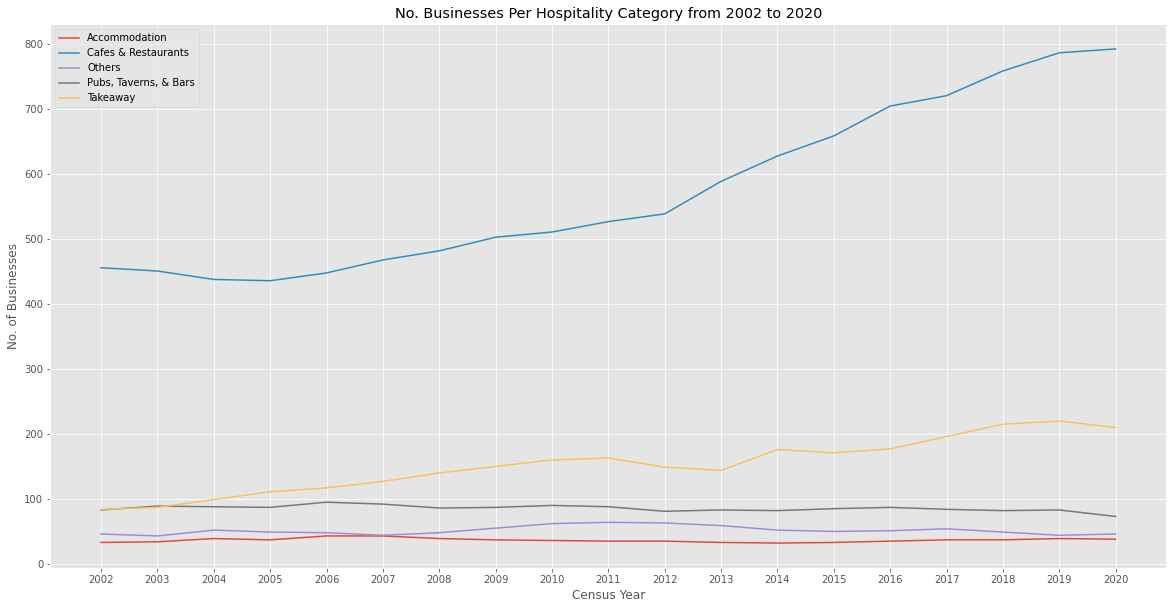

In [185]:
## Plot line graph to show trend of the number of businesses in each category throughout the years
plt.figure(figsize=(20,10))
plt.plot(AccByYrSummy_df['Census year'].astype(str),AccByYrSummy_df['Count'], label = "Accommodation")
plt.plot(CafResYrSummy_df['Census year'].astype(str),CafResYrSummy_df['Count'], label = "Cafes & Restaurants")
plt.plot(OthersYrSummy_df['Census year'].astype(str),OthersYrSummy_df['Count'], label = "Others")
plt.plot(PTBYrSummy_df['Census year'].astype(str),PTBYrSummy_df['Count'], label = "Pubs, Taverns, & Bars")
plt.plot(TakeawayYrSummy_df['Census year'].astype(str),TakeawayYrSummy_df['Count'], label = "Takeaway")
plt.title("No. Businesses Per Hospitality Category from 2002 to 2020")
plt.xlabel("Census Year")
plt.ylabel("No. of Businesses")
plt.legend()
plt.savefig('Business Trend 2002 to 2020.png')
plt.show()

# Analyse The Number Of Businesses Per Hospitality Categoty Per Suburb in 2020 (Latest Avaliable Data)

The objective of this analysis is to identify the number of active businesses per hospitality category per suburb.  This analysis will help users identify where there is a saturation of a particular category in a Suburb.

In [142]:
## Extract the 2020 Census Year Data and create a new Data Frame for the 2020 year
IndTypeDeDuped_df['Census year'] = IndTypeDeDuped_df['Census year'].astype(str)
DataPerYr_df = IndTypeDeDuped_df.groupby('Census year')
DataPerYr_df.first()
Data2020Yr_df = pd.DataFrame(DataPerYr_df.get_group("2020"))
Data2020Yr_df.drop("Census year", inplace=True, axis = 1)
Data2020Yr_df

C:\Users\brand\AppData\Local\Temp/ipykernel_19124/3604838997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IndTypeDeDuped_df['Census year'] = IndTypeDeDuped_df['Census year'].astype(str)


,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,x coordinate,y coordinate,Location,Recategorised Industry,Key Field
5188,502,105226,105226,207 Kensington Road WEST MELBOURNE VIC 3003,West Melbourne (Industrial),207 Kensington Road WEST MELBOURNE VIC 3003,4512,Takeaway Food Services,144.91651,-37.80087,POINT (144.91650740000003 -37.80087212),Takeaway Food Services,2020 207 Kensington Road WEST MELBOURNE VIC 3003
5190,1006,642756,642756,"Lot 163, 410 Footscray Road WEST MELBOURNE VIC...",West Melbourne (Industrial),"Lot 163, 410 Footscray Road WEST MELBOURNE VIC...",4512,Takeaway Food Services,144.93427,-37.80895,POINT (144.9342668 -37.80895387),Takeaway Food Services,"2020 Lot 163, 410 Footscray Road WEST MELBOURN..."
50818,1,611394,611394,545-557 Flinders Street MELBOURNE VIC 3000,Melbourne (CBD),553 Flinders Street MELBOURNE VIC 3000,4512,Takeaway Food Services,144.95651,-37.82098,POINT (144.95651450000003 -37.82097941000001),Takeaway Food Services,2020 553 Flinders Street MELBOURNE VIC 3000
50819,1,611394,611394,545-557 Flinders Street MELBOURNE VIC 3000,Melbourne (CBD),547 Flinders Street MELBOURNE VIC 3000,4511,Cafes and Restaurants,144.95651,-37.82098,POINT (144.95651450000003 -37.82097941000001),Cafes and Restaurants,2020 547 Flinders Street MELBOURNE VIC 3000
50826,4,104034,104034,Flinders Street Railway Station 207-361 Flinde...,Melbourne (CBD),"Part Shop 17, Flinders Street Station Concours...",4511,Cafes and Restaurants,144.96583,-37.81869,POINT (144.9658273 -37.81869275),Cafes and Restaurants,"2020 Part Shop 17, Flinders Street Station Con..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54023,2523,614834,614834,520 Macaulay Road KENSINGTON VIC 3031,Kensington,520 Macaulay Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.92876,-37.79406,POINT (144.9287631 -37.794055910000004),Cafes and Restaurants,2020 520 Macaulay Road KENSINGTON VIC 3031
54028,2524,616011,616011,482 Macaulay Road KENSINGTON VIC 3031,Kensington,482 Macaulay Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.92997,-37.79424,POINT (144.9299685 -37.79424062),Cafes and Restaurants,2020 482 Macaulay Road KENSINGTON VIC 3031
54033,2524,616033,616033,190 Bellair Street KENSINGTON VIC 3031,Kensington,190 Bellair Street KENSINGTON VIC 3031,4512,Takeaway Food Services,144.93006,-37.79396,POINT (144.9300574 -37.79395787000001),Takeaway Food Services,2020 190 Bellair Street KENSINGTON VIC 3031
54044,2533,615050,615050,75-103 Parsons Street KENSINGTON VIC 3031,Kensington,36 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,144.93528,-37.79000,POINT (144.9352778 -37.79000411),Cafes and Restaurants,2020 36 Stubbs Street KENSINGTON VIC 3031


In [187]:
## Identify the number of unique suburbs in the dataframe
SuburbCount_df = pd.DataFrame(Data2020Yr_df.groupby("CLUE small area").size())
SuburbCount_df.rename(columns = {0:"Count"}, inplace = True)
SuburbCount_df

,Count
CLUE small area,
Carlton,64
Docklands,109
East Melbourne,16
Kensington,16
Melbourne (CBD),787
Melbourne (Remainder),4
North Melbourne,38
Parkville,17
Port Melbourne,2


In [177]:
## Create a pivot table that identifies the number of businesses that exists per category type in each suburb
plt.style.use('ggplot')
table_df = pd.DataFrame(pd.pivot_table(data = Data2020Yr_df, index = ['CLUE small area'],columns = ["Recategorised Industry"],aggfunc = 'size',fill_value = 0))
table_df.columns.name = None
table_df

,Accommodation,Cafes and Restaurants,Others,"Pubs, Taverns and Bars",Takeaway Food Services
CLUE small area,,,,,
Carlton,1,43,3,7,10
Docklands,2,82,5,1,19
East Melbourne,2,9,2,1,2
Kensington,0,8,2,0,6
Melbourne (CBD),26,540,25,56,140
Melbourne (Remainder),0,2,1,0,1
North Melbourne,1,24,1,3,9
Parkville,1,10,1,0,5
Port Melbourne,0,1,1,0,0


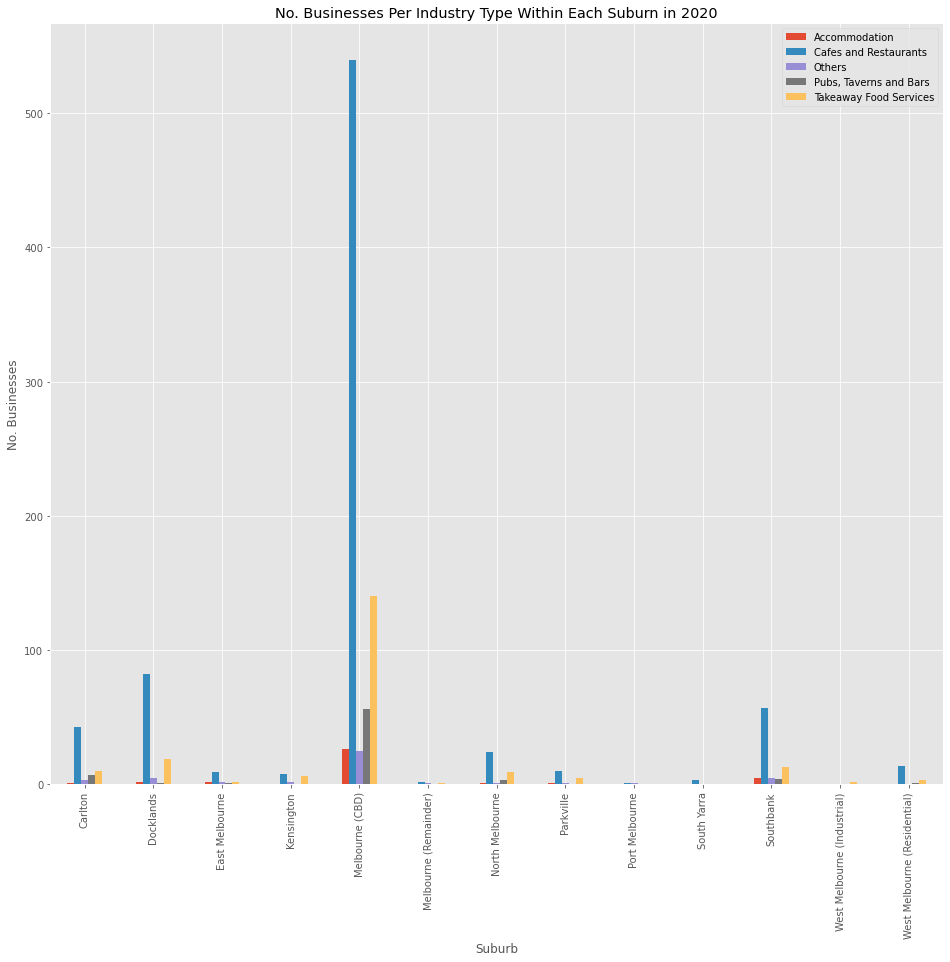

In [186]:
table_df.plot.bar(figsize=(16,14), title="No. Businesses Per Industry Type Within Each Suburn in 2020", xlabel = "Suburb", ylabel="No. Businesses");
plt.savefig('No. Business Per Suburb 2020.png')

In [189]:
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

marker_locations = Data2020Yr_df[['y coordinate','x coordinate']]

fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))